In [1]:
import math
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

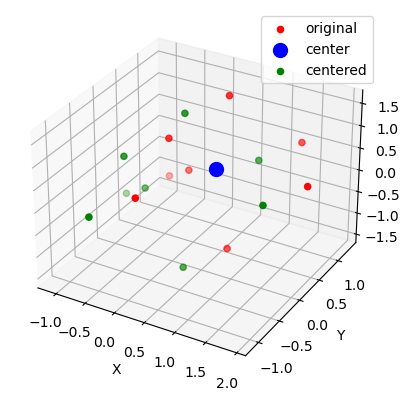

In [2]:
X = np.random.randn(3,8)
center = np.mean(X, axis=1)
X_new = X - center[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:], c='r', marker='o', label='original')
ax.scatter(center[0], center[1], center[2], c='b', marker='o', s=100, label='center')
ax.scatter(X_new[0,:], X_new[1,:], X_new[2,:], c='g', marker='o', label='centered')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [3]:
U, S, V = svd(X_new)

In [4]:
k = 2
W = U[:, :k]
W.shape

(3, 2)

In [5]:
Z = np.dot(W.T, X_new)
Z.shape

(2, 8)

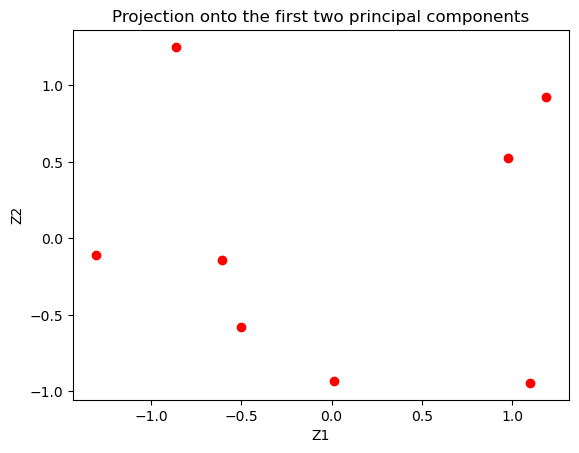

In [6]:
plt.scatter(Z[0,:], Z[1,:], c='r', marker='o')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title("Projection onto the first two principal components")
plt.show()

In [7]:
# compute the explained variance
variance_explained = np.sum(S[:k]**2)/np.sum(S**2)
print("Explained variance: {:.2%}".format(variance_explained))

Explained variance: 84.68%


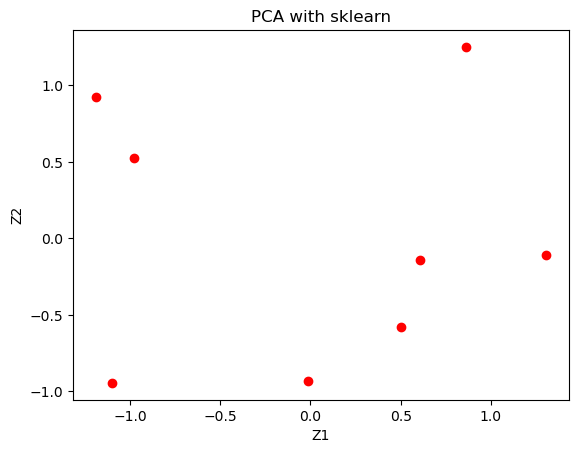

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.T)
Z = pca.transform(X.T)
plt.scatter(Z[:,0], Z[:,1], c='r', marker='o')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title("PCA with sklearn")
plt.show()

In [9]:
print("Our computed W:", W)
print("sklearn's W:", pca.components_.T)

Our computed W: [[ 0.6703113   0.70925305]
 [ 0.18172393  0.12829275]
 [ 0.71948536 -0.69318186]]
sklearn's W: [[-0.6703113   0.70925305]
 [-0.18172393  0.12829275]
 [-0.71948536 -0.69318186]]


In [10]:
print("Our computed explained variance:", S[:k]**2/np.sum(S**2))
print("sklearn's explained variance:", pca.explained_variance_ratio_)

Our computed explained variance: [0.49066426 0.35609714]
sklearn's explained variance: [0.49066426 0.35609714]
